# Support Vector Machines (One vs. One Strategy)



---

In this notebook, we use support vector machines with linear kernel to find the best hyperplane that separates three classes. We experiment with one vs. one strategy and plot the decision boundaries of every trained model as well as the overall decision boundary.

## Packages

In [50]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Data

In [61]:
data = pd.read_csv("elemek3.txt", sep="\t", header=None)
print(data.shape)
data.head()

(600, 3)


,0,1,2
0,2.157515,7.63363,1
1,1.695049,11.02412,1
2,1.661982,10.71134,1
3,1.866261,11.45359,1
4,-1.281339,9.74903,1


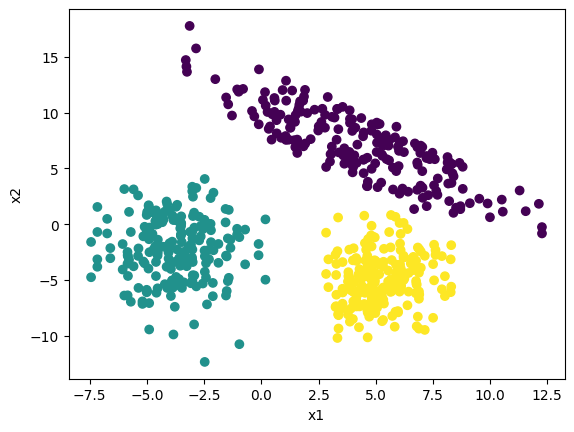

In [65]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=y)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

- It is clear that the data is linearly separable.

## Linear SVM

In [64]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

clf = SVC(kernel="linear", decision_function_shape='ovo')
clf.fit(X, y)
sv = clf.support_vectors_

## Evaluate

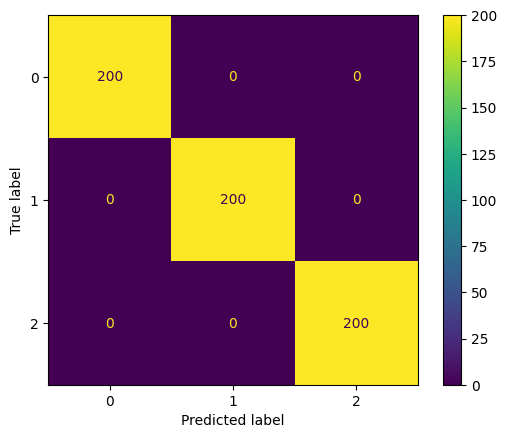

In [66]:
predictions = clf.predict(X)
cm = confusion_matrix(y, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Plot the decision boundary

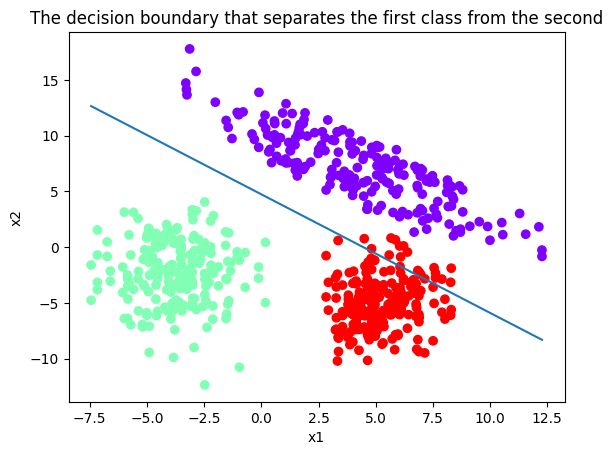

In [70]:
c1_0, c1_1, c1_2 = clf.intercept_[0], clf.coef_[0][0], clf.coef_[0][1]

x1_min, x1_max = data.iloc[:,0].min(), data.iloc[:,0].max()
x1_range = np.linspace(x1_min, x1_max, 100)

plt.plot(x1_range, -(c1_0+c1_1*x1_range)/c1_2)
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap="rainbow")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("The decision boundary that separates the first class from the second")
plt.show()

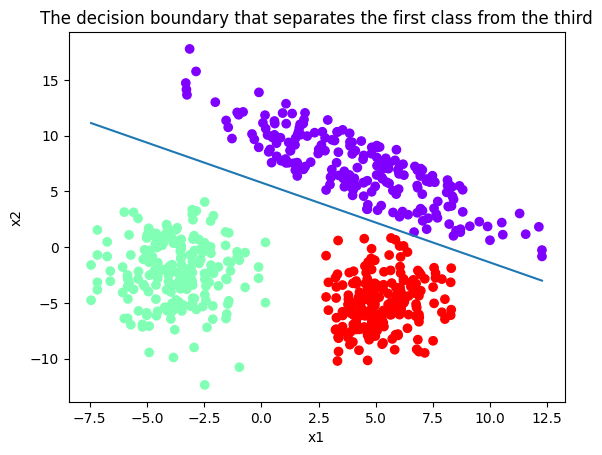

In [71]:
c2_0, c2_1, c2_2 = clf.intercept_[1], clf.coef_[1][0], clf.coef_[1][1]

x1_min, x2_max = data.iloc[:,0].min(), data.iloc[:,0].max()
x1_range = np.linspace(x1_min, x2_max, 100)

plt.plot(x1_range, -(c2_0+c2_1*x1_range)/c2_2)
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap="rainbow")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("The decision boundary that separates the first class from the third")
plt.show()

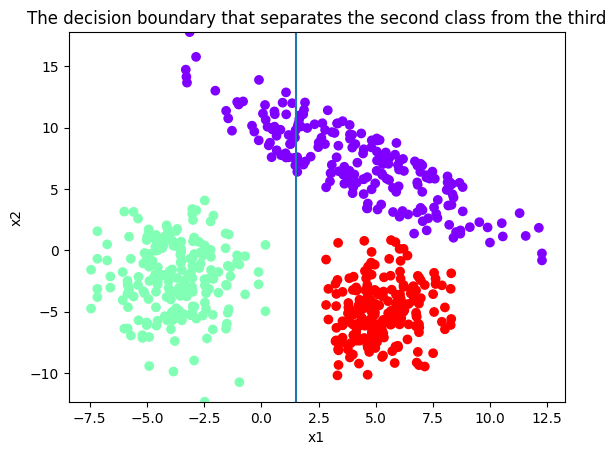

In [73]:
c3_0, c3_1, c3_2 = clf.intercept_[2], clf.coef_[2][0], clf.coef_[2][1]

x_min, x_max = data.iloc[:,0].min(), data.iloc[:,0].max()
x2_min, x2_max = data.iloc[:,1].min(), data.iloc[:,1].max()
x1_range = np.linspace(x_min, x_max, 100)

plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap="rainbow")
plt.plot(x1_range, -(c3_0+c3_1*x1_range)/c3_2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("The decision boundary that separates the second class from the third")
plt.ylim(x2_min,x2_max)
plt.show()

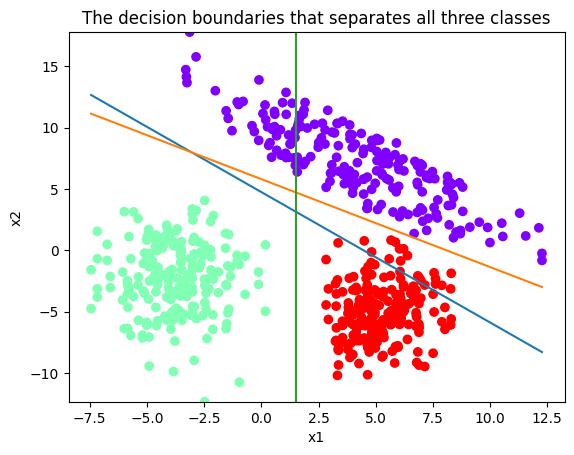

In [76]:
x1_min, x1_max = data.iloc[:,0].min(), data.iloc[:,0].max()
x2_min, x2_max = data.iloc[:,1].min(), data.iloc[:,1].max()
x1_range = np.linspace(x1_min, x1_max, 100)

plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap="rainbow")
plt.plot(x1_range, -(c1_0+c1_1*x1_range)/c1_2)
plt.plot(x1_range, -(c2_0+c2_1*x1_range)/c2_2)
plt.plot(x1_range, -(c3_0+c3_1*x1_range)/c3_2)
plt.ylim(x2_min,x2_max)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("The decision boundaries that separates all three classes")
plt.show()

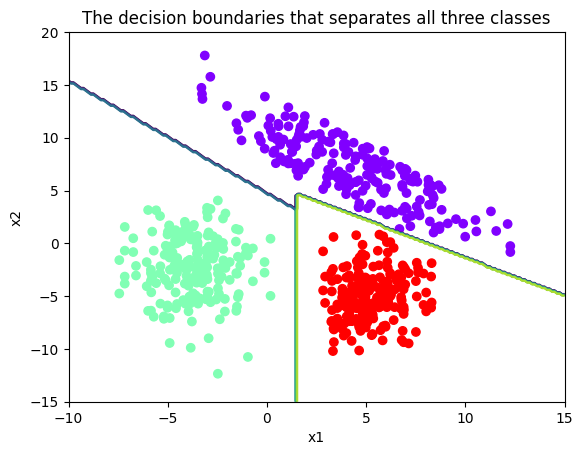

In [78]:
x1_range = np.linspace(-10,15,200);
x2_range = np.linspace(-15,20,200);
[x1_grid,x2_grid] = np.meshgrid(x1_range,x2_range);

predictions = clf.predict(np.c_[np.ravel(x1_grid),np.ravel(x2_grid)])
predictions = predictions.reshape(x1_grid.shape)

plt.scatter(data.iloc[:,0], data.iloc[:,1], c=y, cmap="rainbow")
plt.contour(x1_grid,x2_grid,predictions)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("The decision boundaries that separates all three classes")
plt.show()